# Import modules

In [124]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from Part_2_aero_design_functions import get_design_functions_1MW, single_point_design

matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
# import scienceplots
# matplotlib.style.use("science")

# Function for the absolute thickness vs span for the 35 m blade
def thickness(r, chord_root):
    """Absolute thickness [m] as a function of blade span [m] for 35-m blade"""
    p_edge = [
        9.35996e-8,
        -1.2911e-5,
        7.15038e-4,
        -2.03735e-2,
        3.17726e-1,
        -2.65357,
        10.2616,
    ]  # polynomial coefficients
    t_poly = np.polyval(p_edge, r)  # evaluate polynomial
    t = np.minimum(t_poly, chord_root)  # clip at max thickness
    return t

# Inputs

In [125]:
R = 35  # Rotor radius [m]
tsr = 9.0  # Tip-Speed-Ratio [-]
r_hub = 1.0  # Hub radius [m]
r = np.linspace(r_hub, R - 0.1, 40)  # Rotor span [m]
chord_max = 3.0  # Maximum chord size [m]
chord_root = 2.7  # Chord size at the root [m]
t = thickness(r, chord_root)  # Absolute thickness [m]
B = 3  # Number of blades [#]
# Aero dynamic polar design functions and the values (t/c vs. cl, cd, aoa)
cl_scale = 1.5  # Change this value to scale the cl-values
cl_des, cd_des, aoa_des, tc_vals, cl_vals, cd_vals, aoa_vals = get_design_functions_1MW(
    cl_scale
)

# Solving for the a single design

In [126]:
chord, tc, twist, cl, cd, aoa, a, CLT, CLP, CT, CP = single_point_design(
    r, t, tsr, R, cl_des, cd_des, aoa_des, chord_root, chord_max, B
)

# Plotting design functions

In [127]:
tc_plot = np.linspace(0, 100, 100)
fig1, axs1 = plt.subplots(3, 1, num=1)

axs1[0].plot(tc_plot, cl_des(tc_plot), "k")
axs1[0].plot(tc_vals, cl_vals, "ok")
axs1[0].set_ylabel("$C_l$ [-]")
axs1[0].set_xlim(0, 100)

axs1[1].plot(tc_plot, cd_des(tc_plot), "k")
axs1[1].plot(tc_vals, cd_vals, "ok")
axs1[1].set_ylabel("$C_d$ [-]")
axs1[1].set_xlim(0, 100)

axs1[2].plot(tc_plot, aoa_des(tc_plot), "k")
axs1[2].plot(tc_vals, aoa_vals, "ok")
axs1[2].set_ylabel(r"$\alpha$ [-]")
axs1[2].set_xlabel(r"$t/c$ [deg]")
axs1[2].set_xlim(0, 100)

fig1.tight_layout()

# Plot the chord, twist and relative-thickness

In [128]:
fig2, axs2 = plt.subplots(3, 1, num=2, clear=True)

# Chord
axs2[0].plot(r, chord)
axs2[0].set_ylabel("Chord [m]")
axs2[0].set_xlim(0, R)

# Twist
axs2[1].plot(r, twist)
axs2[1].set_ylabel("Twist [deg]")
axs2[1].set_xlim(0, R)

# t/c
axs2[2].plot(r, tc)
axs2[2].set_ylabel("Rel. thickness [%]")
axs2[2].set_xlabel("Rotor span [m]")
axs2[2].set_xlim(0, R)

fig2.tight_layout()

# Plot r vs. t/c, aoa, cl, cd

In [129]:
fig3, axs3 = plt.subplots(2, 2, num=3, clear=True)

# t/c
axs3[0, 0].plot(r, tc)
axs3[0, 0].set_ylabel("t/c [%]")
axs3[0, 0].set_xlim(0, R)

# aoa
axs3[0, 1].plot(r, aoa)
axs3[0, 1].set_ylabel(r"$\alpha$ [deg]")
axs3[0, 1].set_xlim(0, R)
axs3[0, 1].yaxis.tick_right()
axs3[0, 1].yaxis.set_label_position("right")

# cl
axs3[1, 0].plot(r, cl)
axs3[1, 0].set_ylabel("$C_l$ [-]")
axs3[1, 0].set_xlabel("Span [m]")
axs3[1, 0].set_xlim(0, R)

# cd
axs3[1, 1].plot(r, cd)
axs3[1, 1].set_ylabel("$C_d$ [-]")
axs3[1, 1].set_xlabel("Span [m]")
axs3[1, 1].set_xlim(0, R)
axs3[1, 1].yaxis.tick_right()
axs3[1, 1].yaxis.set_label_position("right")

fig3.tight_layout()

# Plot r vs. CLT, CLP, a

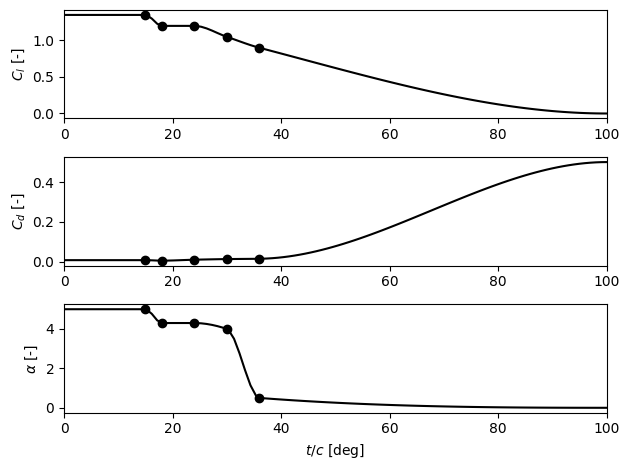

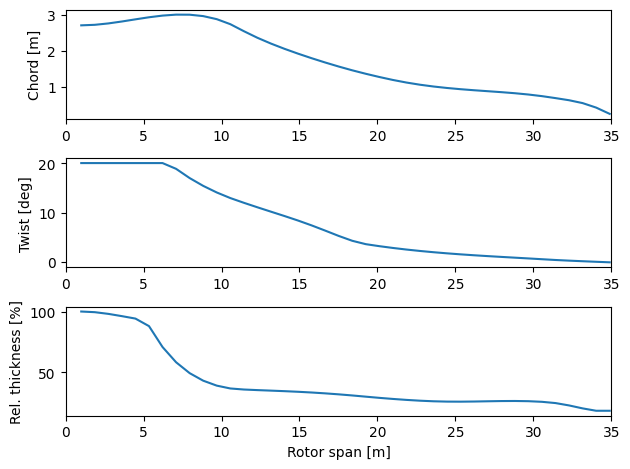

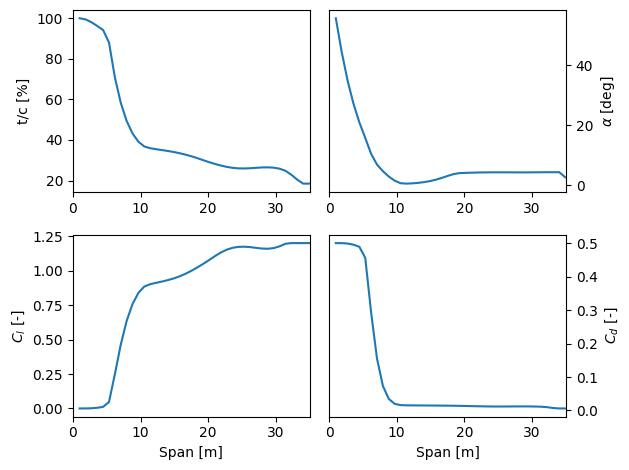

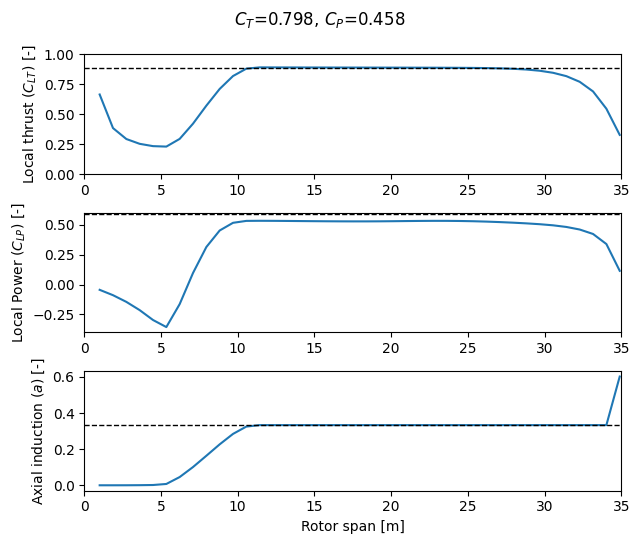

In [130]:
fig4, axs4 = plt.subplots(3, 1, num=4, clear=True, figsize=(6.5, 5.5))

# Local-Thrust-Coefficient
axs4[0].plot(r, CLT)
axs4[0].axhline(y=8 / 9, ls="--", color="k", lw=1)
axs4[0].set_ylabel("Local thrust ($C_{LT}$) [-]")
axs4[0].set_ylim(0, 1.0)
axs4[0].set_xlim(0, R)

# Local-Power-Coefficient
axs4[1].plot(r, CLP)
axs4[1].axhline(y=16 / 27, ls="--", color="k", lw=1)
axs4[1].set_ylabel("Local Power ($C_{LP}$) [-]")
axs4[1].set_xlim(0, R)
axs4[1].set_ylim(-0.4, 0.6)

# Axial Induction
axs4[2].plot(r, a)
axs4[2].axhline(y=1 / 3, ls="--", color="k", lw=1)
axs4[2].set_ylabel("Axial induction ($a$) [-]")
axs4[2].set_xlabel("Rotor span [m]")
axs4[2].set_xlim(0, R)

fig4.suptitle(f"$C_T$={CT:1.3f}, $C_P$={CP:1.3f}")
fig4.tight_layout()

plt.show()

In [131]:
plt.figure
plt.plot(CP, tsr)

In [134]:
import numpy as np
from scipy.optimize import fsolve

# Define constants (Assume the values are given or you can replace them with actual values)
V_rated_ClassX = 11.4  # example value
R_ClassX = 89         # example value
I_rated_ClassX = 0.18  # example value
I_rated_ClassY = 0.16 # example value

# Define the system of equations
def equations(vars):
    R_ClassY, V_rated_ClassY = vars
    
    eq1 = R_ClassY - ((V_rated_ClassX * (1 + 2 * I_rated_ClassX)) / (V_rated_ClassY * (1 + 2 * I_rated_ClassY)))**(2/3) * R_ClassX
    eq2 = V_rated_ClassY - (R_ClassX / R_ClassY)**(2/3) * V_rated_ClassX
    
    return [eq1, eq2]

# Initial guess for the values of R_ClassY and V_rated_ClassY
initial_guess = [50, 100]  # Replace with appropriate guesses

# Solve the system of equations
solution = fsolve(equations, initial_guess)

R_ClassY, V_rated_ClassY = solution

# Print the results
print(f"R_ClassY: {R_ClassY}")
print(f"V_rated_ClassY: {V_rated_ClassY}")

TSR_new = 

R_ClassY: 92.24609261204758
V_rated_ClassY: 11.13096634399476
